<a href="https://colab.research.google.com/github/EmmanuelABonsu/CE888/blob/main/src/lab3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score as acc
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import itertools



In [63]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")
df.head()
# print(len(df. columns))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [30]:
# Data Processing

# convert a string variable to a categorical one
df[["y"]] = df[["y"]].apply(LabelEncoder().fit_transform)
df.head()

# Perform one-hot encoding on the categorical features using
cat_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
df_cat = pd.get_dummies(df, columns=cat_features)
df_cat.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [31]:
# drop duration
df_cat = df_cat.drop("duration", axis= 1)
df_cat.head()
print(len(df_cat. columns))

63


In [32]:
# Dropping Nan rows
print("Number of rows before dropping NaNs: %d" % len(df_cat))
df_cat = df_cat.dropna()
print("Number of rows after dropping NaNs: %d" % len(df_cat))
print("Number of missing values: ",df_cat.isnull().sum().sum())

Number of rows before dropping NaNs: 41188
Number of rows after dropping NaNs: 41188
Number of missing values:  0


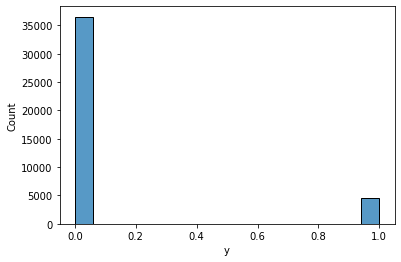

In [33]:
# Plotting histogram of label
Y = df_cat['y']
sns_plot = sns.histplot(Y, kde=False)

# TO DO: CALCULATE IMBALANCE IN DATA

In [86]:
features = []
for col in df_cat.columns: 
    features.append(str(col))
features.remove('y')
print(features)

['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed

In [34]:
# Defining X and y
X = df_cat.drop('y', axis= 1)
# X.head()

y = df_cat['y']
# y.head()

In [44]:
# Splitting Data into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=50)

In [45]:
# Modelling
clf = RandomForestClassifier(max_depth=8, n_estimators=100) # Default number of trees is 100 
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.30 +/- 0.04


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
# New Model 
clf_2 = RandomForestClassifier(max_depth=6, n_estimators=400, random_state=60) 
clf_2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=60, verbose=0,
                       warm_start=False)

In [51]:
y_predict = clf_2.predict(X_test)
print("Accuracy score on Test Data",f1_score(y_test, y_predict))

Accuracy score on Test Data 0.30846605196982396


In [71]:
clf = RandomForestClassifier(max_depth=6, n_estimators=400, random_state=60)
clf.fit(X_train, y_train)
print("ExtraTrees ACC = %.2f" % f1_score(y, clf.predict(X)))

ExtraTrees ACC = 0.29


[ 8  7  2 61  4  6  5  3  0 60 59 49 52 50 42 43 44 53 48  1 55 33 10 17
 34 14 31 45 56 57 23 27 51 46 47 58 22 28 54 18 38 36 16  9 30 39 41 32
 25 21 15 19 13 20 26 40 37 11 12 24 29 35]
62 62
Feature ranking:
1. nr.employed (0.169919)
2. euribor3m (0.149738)
3. pdays (0.115682)
4. poutcome_success (0.096064)
5. emp.var.rate (0.092905)
6. cons.conf.idx (0.078494)
7. cons.price.idx (0.056845)
8. previous (0.028729)
9. age (0.024708)
10. poutcome_nonexistent (0.021374)
11. poutcome_failure (0.018949)
12. month_mar (0.018282)
13. month_oct (0.015799)
14. month_may (0.014310)
15. contact_cellular (0.012540)
16. contact_telephone (0.011753)
17. month_apr (0.006585)
18. month_sep (0.006347)
19. month_jun (0.005000)
20. campaign (0.004507)
21. day_of_week_mon (0.003741)
22. default_no (0.003327)
23. job_blue-collar (0.003273)
24. job_student (0.003189)
25. default_unknown (0.003129)
26. job_retired (0.002874)
27. education_university.degree (0.002085)
28. month_aug (0.001694)
29. day_of_we

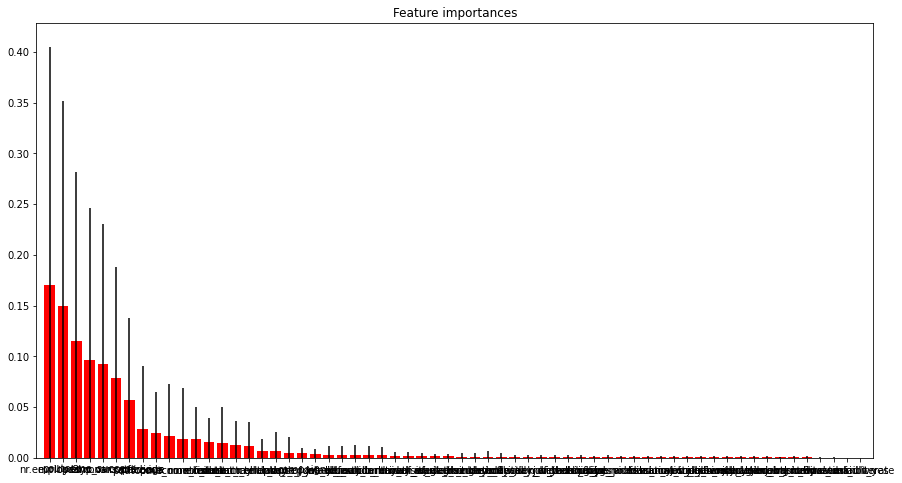

In [87]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

print(len(features), len(indices))
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)


Normalized confusion matrix


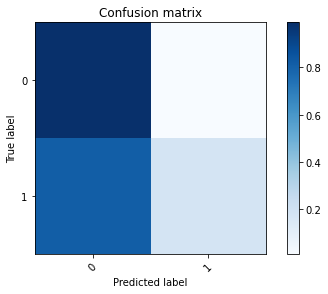

In [37]:
# Comparing with Dummy classifier
dummy_clf = DummyClassifier(strategy='stratified')
scores_dummy = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))
print("ACC: %.2f +/- %.2f" % (scores_dummy.mean(), scores_dummy.std()))

ACC: 0.11 +/- 0.02


In [38]:
# Using Gridsearch to find best hyperparameters
param_grid = { 
    'n_estimators': [100, 150, 200, 250],
    'max_features': ['auto', 'sqrt', 'log2'], 
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 150}


In [39]:
# Generalization Error
y_predict = CV_rfc.predict(X_test)
print("Accuracy score on Test Data",f1_score(y_test, y_predict))

Accuracy score on Test Data 0.2604817127564674
